In [1]:
from mnist import MNIST

mnist = MNIST('./data')
_ = mnist.load_testing()

In [2]:
images, labels = mnist.load_training()

In [3]:
len(images), len(labels)

(60000, 60000)

In [4]:
len(images[0])

784

In [5]:
28 * 28

784

In [6]:
import numpy as np

images = np.array(images).astype('float32') / 255
images.dtype

dtype('float32')

In [7]:
labels = np.array(labels)
labels.dtype

dtype('uint8')

In [8]:
labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
labels[60000 - 10:]

array([9, 2, 9, 5, 1, 8, 3, 5, 6, 8], dtype=uint8)

In [10]:
labels[-10:]

array([9, 2, 9, 5, 1, 8, 3, 5, 6, 8], dtype=uint8)

In [11]:
labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

In [12]:
batch_size = 100

# batch 0
images[:batch_size]
labels[:batch_size]

# batch 1
images[batch_size:batch_size * 2]
labels[batch_size:batch_size * 2]

# batch 2
images[batch_size * 2:batch_size * 3]
labels[batch_size * 2:batch_size * 3]

# batch n
n = 10

images[batch_size * n:batch_size * (n + 1)]
labels[batch_size * n:batch_size * (n + 1)]

batch_size = 10

offset = batch_size * n
labels[offset:offset + batch_size]

def batch(data, index, batch_size):
    offset = batch_size * index
    return data[offset:offset + batch_size]

batch(labels, 10, 10)

array([5, 7, 1, 7, 1, 1, 6, 3, 0, 2], dtype=uint8)

In [13]:
images.shape

(60000, 784)

In [14]:
images2d = images.reshape([-1, 28, 28])

images2d.shape

(60000, 28, 28)

5


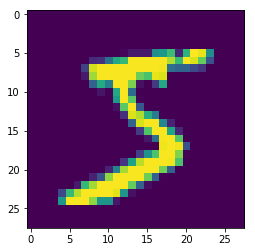

0


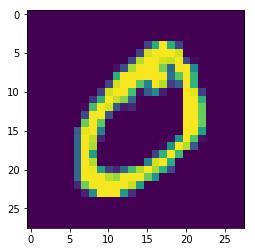

4


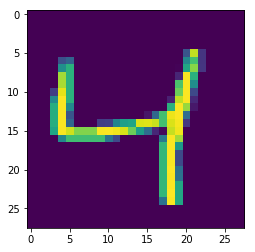

1


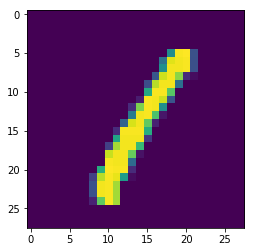

9


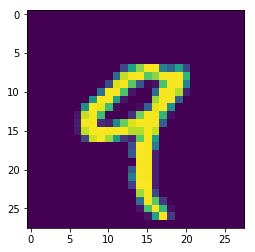

2


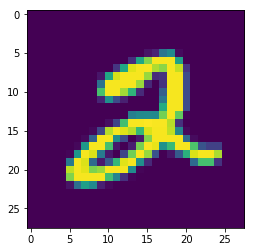

1


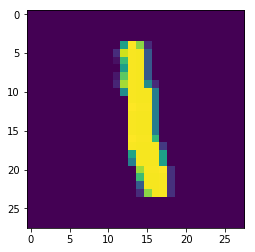

3


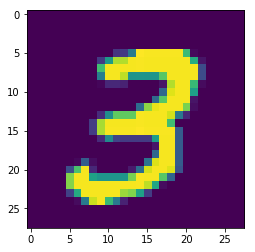

1


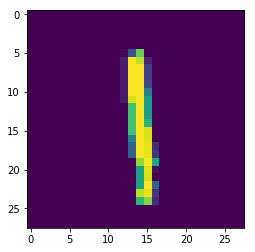

4


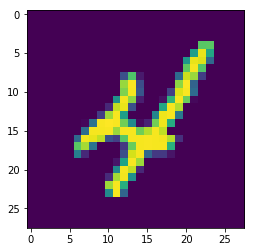

In [15]:
import matplotlib.pyplot as plt

for i in range(10):
    print(labels[i])
    plt.imshow(images2d[i])
    plt.show()

In [16]:
import tensorflow as tf

x = tf.constant(images[:1000])
w = tf.Variable(tf.truncated_normal([28 * 28, 10]))
b = tf.Variable(tf.truncated_normal([10]))
y = tf.nn.softmax(tf.matmul(x, w) + b)

z = tf.one_hot(labels[:1000], 10)

cross_entropy = -tf.reduce_sum(z * tf.log(y), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [17]:
# Training

session = tf.Session()
session.run(tf.global_variables_initializer())

print(session.run(loss))

for i in range(10):
    for j in range(20):
        session.run(train)
    print(session.run(loss))

14.8579
2.33474
1.48439
1.1025
0.887818
0.751182
0.655389
0.582831
0.524471
0.475648
0.433901


In [18]:
# Testing

test_x = tf.constant(images[1000:2000])
test_y = tf.nn.softmax(tf.matmul(test_x, w) + b)

correct = tf.equal(tf.argmax(test_y, axis=1), labels[1000:2000])
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

session.run(accuracy)

0.74299997

0 != 5


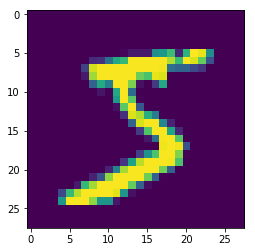

7 != 0


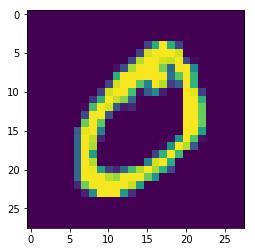

1 != 4


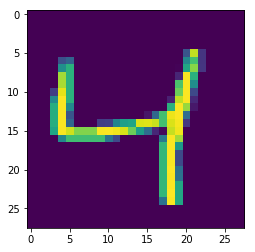

4 != 2


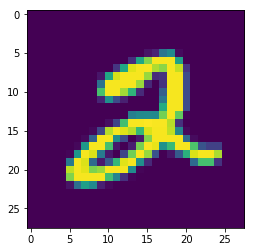

4 != 1


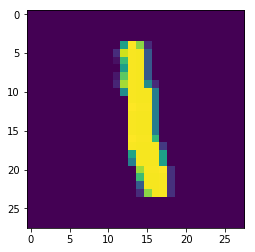

4 != 1


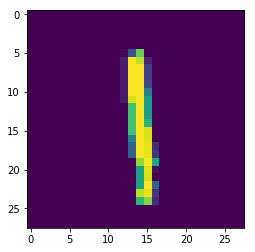

2 != 4


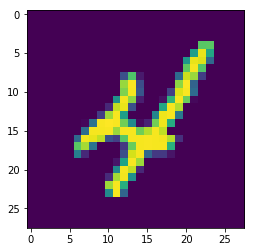

In [19]:
predictions = session.run(tf.argmax(test_y, axis=1))

for i in range(10):
    if predictions[i] != labels[i]:
        print(predictions[i], '!=', labels[i])
        plt.imshow(images2d[i])
        plt.show()

In [20]:
# CNN
# --> Deep Learning

In [21]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.reduce_sum(x)

data = {
    x: images[:10]
}

session.run(y, feed_dict=data)

918.83923

In [22]:
data = {
    x: images[10:20]
}

session.run(y, feed_dict=data)

890.14911

In [23]:
x = tf.placeholder(tf.float32, [None, 28, 28, 1])
z = tf.placeholder(tf.int64, [None])

In [24]:
c1_k = 16
c2_k = 32
fc_k = 1024

In [25]:
# Convolution Layer 1

c1_w = tf.Variable(tf.truncated_normal([5, 5, 1, c1_k], stddev=0.1))
c1_b = tf.Variable(tf.truncated_normal([c1_k], stddev=0.1))
c1_u = tf.nn.conv2d(x, c1_w, strides=[1, 1, 1, 1], padding='SAME') + c1_b
c1_y = tf.nn.relu(c1_u)
c1_y.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(16)])

In [26]:
# Pooling Layer 1

p1_y = tf.nn.max_pool(c1_y, ksize=[1, 2, 2, 1],
                      strides=[1, 2, 2, 1], padding='SAME')
p1_y.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(16)])

In [27]:
# Convolution Layer 2

c2_w = tf.Variable(tf.truncated_normal([5, 5, c1_k, c2_k], stddev=0.1))
c2_b = tf.Variable(tf.truncated_normal([c2_k], stddev=0.1))
c2_u = tf.nn.conv2d(p1_y, c2_w, strides=[1, 1, 1, 1], padding='SAME') + c2_b
c2_y = tf.nn.relu(c2_u)
c2_y.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(32)])

In [28]:
# Pooling Layer 2

p2_y = tf.nn.max_pool(c2_y, ksize=[1, 2, 2, 1],
                      strides=[1, 2, 2, 1], padding='SAME')
p2_y.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(32)])

In [29]:
fc_x = tf.reshape(p2_y, [-1, 7 * 7 * c2_k])
fc_x.shape

TensorShape([Dimension(None), Dimension(1568)])

In [30]:
7 * 7 * c2_k

1568

In [31]:
# Fully Connected Layer

fc_w = tf.Variable(tf.truncated_normal([7 * 7 * c2_k, fc_k], stddev=0.1))
fc_b = tf.Variable(tf.truncated_normal([fc_k], stddev=0.1))
fc_y = tf.nn.relu(tf.matmul(fc_x, fc_w) + fc_b)
fc_y.shape

TensorShape([Dimension(None), Dimension(1024)])

In [32]:
# Output Layer

keep_prob = tf.placeholder(tf.float32)
drop_y = tf.nn.dropout(fc_y, keep_prob=keep_prob)

w = tf.Variable(tf.truncated_normal([fc_k, 10], stddev=0.1))
b = tf.Variable(tf.truncated_normal([10], stddev=0.1))
y = tf.nn.softmax(tf.matmul(drop_y, w) + b)
y.shape

TensorShape([Dimension(None), Dimension(10)])

In [33]:
cross_entropy = -tf.reduce_sum(tf.one_hot(z, 10) * tf.log(y), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.AdamOptimizer(0.001).minimize(loss)

In [34]:
correct = tf.equal(tf.argmax(y, axis=1), z)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [35]:
# Training & Test

session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: images2d[:1000].reshape([-1, 28, 28, 1]),
    z: labels[:1000],
    keep_prob: 1.0
}

batch_size = 100

print(session.run(accuracy, feed_dict=test_data))

for i in range(100):
    data = {
        x: batch(images2d[1000:], i, batch_size).reshape([-1, 28, 28, 1]),
        z: batch(labels[1000:], i, batch_size),
        keep_prob: 0.5
    }
    session.run(train, feed_dict=data)
    print(session.run(accuracy, feed_dict=test_data))

0.101
0.175
0.137
0.254
0.398
0.492
0.567
0.594
0.589
0.63
0.685
0.738
0.774
0.77
0.793
0.797
0.797
0.82
0.855
0.863
0.86
0.859
0.854
0.855
0.862
0.877
0.882
0.889
0.894
0.893
0.904
0.909
0.907
0.916
0.915
0.911
0.912
0.912
0.915
0.91
0.908
0.912
0.921
0.921
0.923
0.925
0.929
0.927
0.925
0.918
0.913
0.914
0.919
0.914
0.916
0.923
0.924
0.923
0.927
0.93
0.926
0.929
0.93
0.938
0.941
0.945
0.943
0.945
0.94
0.936
0.938
0.935
0.94
0.941
0.941
0.943
0.942
0.941
0.939
0.942
0.948
0.948
0.949
0.946
0.947
0.954
0.955
0.956
0.951
0.948
0.946
0.944
0.944
0.946
0.952
0.95
0.945
0.941
0.942
0.941
0.941
